## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,RocCurveDisplay,auc

### Read the dataset

In [ ]:
df = pd.read_csv('Dataset.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

### Preprocessing & cleaning Data

In [ ]:
df.isnull().sum()

In [ ]:
drop_missing_values_columns = df.isnull().sum() > 1000
drop_missing_values_columns = drop_missing_values_columns[drop_missing_values_columns].index
df = df.drop(columns=drop_missing_values_columns,axis=1)

hadnle_missing_values_columns = df.isnull().sum() > 0
hadnle_missing_values_columns = hadnle_missing_values_columns[hadnle_missing_values_columns].index

for i in hadnle_missing_values_columns:
    df[i] = df[i].fillna(method='ffill')

df = df.dropna()

In [ ]:
ss = StandardScaler()
df[['Number_of_vehicles_involved','Number_of_casualties']] = ss.fit_transform(df[['Number_of_vehicles_involved','Number_of_casualties']])

In [ ]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].apply(lambda x: 'Under 18' if x == '5' else x)

### Identify and analyze patterns in the data.

In [ ]:
display(df.groupby(['Weather_conditions','Driving_experience']).agg(
    Counts =('Driving_experience','count'),
))

In [ ]:
# we can see in the second table that most of the road condition in dry condition even in normal weather conditions they would have the higher rate of accedints
display(df.groupby(['Weather_conditions','Road_surface_conditions']).agg(
    Counts =('Driving_experience','count'),
))


In [ ]:
display(df.groupby(['Weather_conditions','Accident_severity']).agg(
    Counts =('Driving_experience','count'),
))

In [ ]:
display(df.groupby(['Weather_conditions','Day_of_week']).agg(
    Counts =('Driving_experience','count'),
))

In [ ]:
display(df['Age_band_of_driver'].value_counts())

In [ ]:
display(df['Type_of_vehicle'].value_counts())

In [ ]:
display(df['Age_band_of_driver'].value_counts())

In [ ]:
display(df['Type_of_vehicle'].value_counts())

In [ ]:

display(df['Number_of_vehicles_involved'].mean())

In [ ]:

display(df['Number_of_casualties'].mean())

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

In [ ]:
plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_vehicles_involved'])
plt.show()

plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_casualties'])
plt.show()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


In [ ]:
Encoded_df = df.copy()
le = LabelEncoder()

for i in Encoded_df.select_dtypes(include='object').columns:
  Encoded_df[i] = le.fit_transform(Encoded_df[i])

display(df.select_dtypes(exclude='object').corr())

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


In [ ]:
plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_vehicles_involved'])
plt.show()

In [ ]:
plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_casualties'])
plt.show()

In [ ]:

plt.figure(figsize=(5, 5))
plt.barh(df['Weather_conditions'].value_counts().index, df['Weather_conditions'].value_counts().values)
plt.show()

In [ ]:


plt.figure(figsize=(5, 5))
plt.barh(df['Day_of_week'].value_counts().index, df['Day_of_week'].value_counts().values)
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(df['Road_surface_conditions'].value_counts().index, df['Road_surface_conditions'].value_counts().values)
plt.show()

In [ ]:

plt.figure(figsize=(5, 5))
plt.barh(df['Driving_experience'].value_counts().index, df['Driving_experience'].value_counts().values)
plt.show()

In [ ]:

plt.figure(figsize=(20, 20))
sns.heatmap(Encoded_df.corr(), annot=True)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(df['Weather_conditions'].value_counts(), labels=df['Weather_conditions'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:

plt.figure(figsize=(5, 5))
plt.pie(df['Day_of_week'].value_counts(), labels=df['Day_of_week'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:

plt.figure(figsize=(5, 5))
plt.pie(df['Road_surface_conditions'].value_counts(), labels=df['Road_surface_conditions'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:

plt.figure(figsize=(5, 5))
plt.pie(df['Accident_severity'].value_counts(), labels=df['Accident_severity'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:

plt.figure(figsize=(5, 5))
plt.boxplot(df['Number_of_vehicles_involved'].value_counts())
plt.show()

In [ ]:

plt.figure(figsize=(5, 5))
plt.boxplot(df['Number_of_casualties'].value_counts())
plt.show()

## Insights & Decisions of EDA

### Insights
- we can see in the first table that most of the driving experience in 5-10 years even in normal weather conditions they would have the higher rate of accedints
- we can see in the second table that most of the road condition in dry condition even in normal weather conditions they would have the higher rate of accedints
- There is no much fatal injuries in whatever the weather condition are. if they are exist they tend to be small number
- Sunday would be the safest day to have an accedint in all types of conditions
- Accedint occur more in driver between 18-50 years
- Automobile vehicle tend to have accident more than any type of cars
- both numerical values tend to have skewed to the left distribution
- we can see from the correlation of the heatmap that there is no correlation
- in most of the columns except Casulaty_class, Sex_of_casualty, Age-band_of_casualty, Casualty_severity columns. and it's highly postive correlated
- From the boxplot we can see that there is only one value in both numerical values are outliers
- the calculation of the numerical values would depend on the values counts becuase the numbers are small even after the standard scaler

### Decisions
- Make warning especially in normal weather conditions becuase they tend to have more accidents
- Try to fix the problem in automobile cars to minimize the accidents
- Do seminar about driving recklessly especially for people between the ages of 18-50
- Warn people no to dry in wet weather condition becuase of slippery roads
- After 2 years from getting first driving license, start do some warning and needing to test driving skills due to increase of accidents after 2 years of getting the driving license rapidly

## Train-Test Split

In [ ]:
X = df.drop(columns=['Accident_severity','Sex_of_driver','Road_allignment','Pedestrian_movement'],axis=1)
y = df['Accident_severity']

numeric_features = ['Number_of_vehicles_involved', 'Number_of_casualties','Ratio_vehicles_casualties']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Time','Day_of_week', 'Age_band_of_driver','Educational_level', 'Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured','Lanes_or_Medians', 'Types_of_Junction','Road_surface_type', 'Road_surface_conditions', 'Light_conditions','Weather_conditions', 'Type_of_collision', 'Vehicle_movement','Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty','Casualty_severity', 'Cause_of_accident']

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

#### Logistic Regression

In [ ]:
LR_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))]
)

LR_model.fit(X_train,y_train)
LR_y_pred = LR_model.predict(X_test)

#### Decision Tree Classifier

In [ ]:
DTC_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

DTC_model.fit(X_train,y_train)
DTC_y_pred = DTC_model.predict(X_test)

#### Support Vector Machine (SVM)

In [ ]:
SVC_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

SVC_model.fit(X_train,y_train)
SVC_y_pred = SVC_model.predict(X_test)

#### K-Neighbors Classifier

In [ ]:
KNN_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=9))]
)

KNN_model.fit(X_train,y_train)
KNN_y_pred = KNN_model.predict(X_test)

## Model Evaluation

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

This is the model LogisticRegression
Confusion Matrix [[   2    2   33]
 [   0   26  342]
 [   2   29 2027]]
Accuracy Score 0.8343483556638246
Recall Score 0.8343483556638246
F1 Score 0.8343483556638247
Precision Score 0.8343483556638246


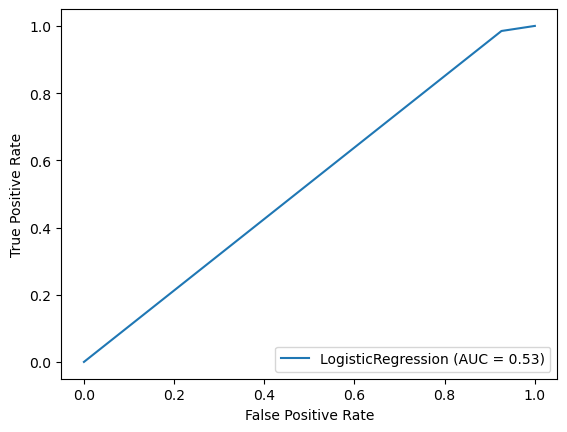




This is the model DecisionTreeClassifier
Confusion Matrix [[  19    2   16]
 [   4  171  193]
 [   7  130 1921]]
Accuracy Score 0.857084855866829
Recall Score 0.857084855866829
F1 Score 0.857084855866829
Precision Score 0.857084855866829


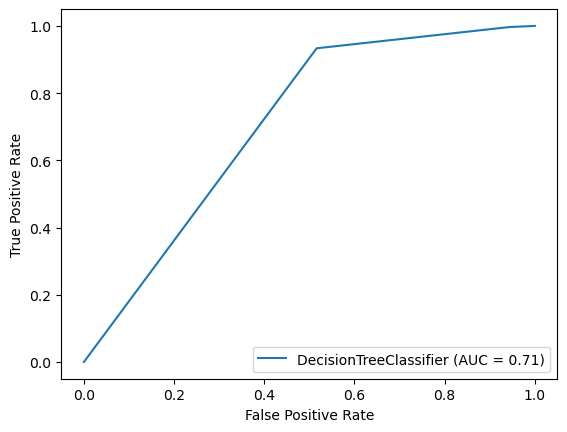




This is the model SVC
Confusion Matrix [[   0    0   37]
 [   0    4  364]
 [   0    0 2058]]
Accuracy Score 0.8371904181892001
Recall Score 0.8371904181892001
F1 Score 0.8371904181892001
Precision Score 0.8371904181892001


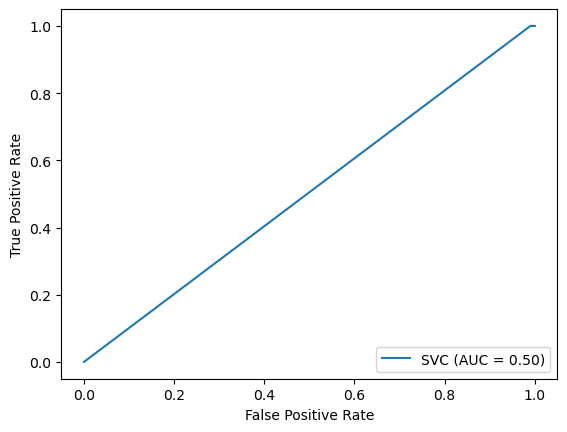




This is the model KNeighborsClassifier
Confusion Matrix [[   4    1   32]
 [   0   26  342]
 [   1   17 2040]]
Accuracy Score 0.8404384896467723
Recall Score 0.8404384896467723
F1 Score 0.8404384896467723
Precision Score 0.8404384896467723


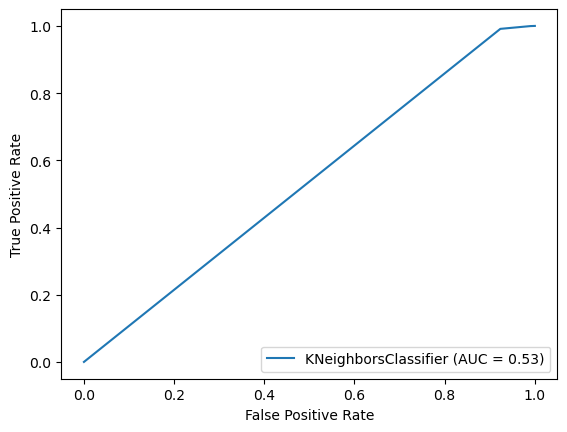

In [ ]:
models_prediction = [LR_y_pred,DTC_y_pred,SVC_y_pred,KNN_y_pred]
models_name = ['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier']

# Scores need to make it numerical to be calculated that's why I used Label Encoder in y_pred of each model and y_test
le = LabelEncoder()
fitted_y_test = le.fit_transform(y_test)
    
for i in range(4):
    fitted_prediction= le.fit_transform(models_prediction[i])
    print(f"This is the model {models_name[i]}")
    print(f"Confusion Matrix {confusion_matrix(y_test,models_prediction[i])}")
    print(f"Accuracy Score {accuracy_score(y_test,models_prediction[i])}")
    print(f"Recall Score {recall_score(y_test,models_prediction[i],average='micro')}")
    print(f"F1 Score {f1_score(y_test,models_prediction[i],average='micro')}")
    print(f"Precision Score {precision_score(y_test,models_prediction[i],average='micro')}")
    fpr, tpr, thresholds = roc_curve(fitted_y_test,fitted_prediction,pos_label=2)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=models_name[i])
    display.plot()
    plt.show()
    print('\n'*2)
    
    ### roc_auc_score didn't work with me due to the multi-class problem
    # print(f"ROC & AUC Score {roc_auc_score(y_test,i,multi_class='ovr')}")



#### Compare Metrix: 
- we can see that the best model with the highest metrix close to 1 is Decision Tree Classifier with Accuracy 0.853

#### Evaluate Trade-offs
- I deleted some features becuase features were biased and most of the data in them were into one sided that's why I deleted them to make the computational efficiency better and that helped in 0.6 seconds to increase the computational time and it didn't change the models results
- Choosing between the most efficient in time it would be Decision Tree Classifier and the worst would be the SVC. in the implementation it wouldn't be a different between the models

#### Justify Your Choice
- From the metrics and Trade-offs sides, we can conclude that the Decision Tree Classifier is better than the rest of the classifiers used in this dataset. In addition we can see in the ROC Curve that the best model would be the Decision Tree Classifier

#### Feature Importance
- The best feature would be Number_of_vehicle_involvev feature. It has the best positive correlation between the rest with the featured extracted from Number_of_vehicle_involved which is Ratio_vehicles_casualties.

#### Model Limitations
- It cannot accept categorical data even though the prediction would be categorical data. In addition, the models doesn't accept timeseries columns.

#### Future Improvements
- We could change different algorithms like Naive Bayes or others
- We could select the features using Lasso model
- We could clean the data using regression model like logistic regression instead of using th ffill method or mode or delete the row or the column
- We could use grid-search to find the best paramater to whatever model that we are using instead of just testing
- We could add more numerical data, so that the model would work better in prediction
- We can check the relation and depend on the relationships between the features and predictor, we can delete some features and add more instead like collecting more data for this position or others. Cannot do this in this dataset due to having just categorical data and just 2 numerical data with discrete values